In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False) 

In [2]:
X, y = mnist.data , mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

#### image reshape

In [7]:
import matplotlib.pyplot as plt

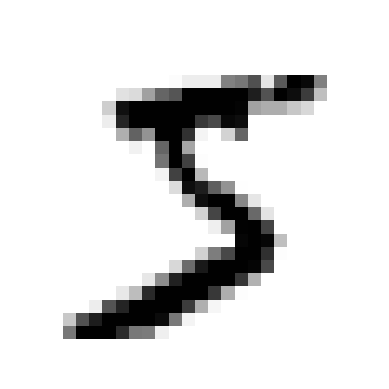

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

#### train set 

In [10]:
X_train , X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### 5-detector

In [11]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

#### SGD Classifier

In [12]:
from sklearn.linear_model import  SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

#### Confusion Matrix

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from  sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### Precision and recall

In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

#### F1 score

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

#### Precision/Recall Trade-off

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)

In [31]:
threshold = 3000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [33]:
from sklearn.metrics import precision_recall_curve

In [35]:
precision , recalls, thersholds = precision_recall_curve(y_train_5, y_scores)

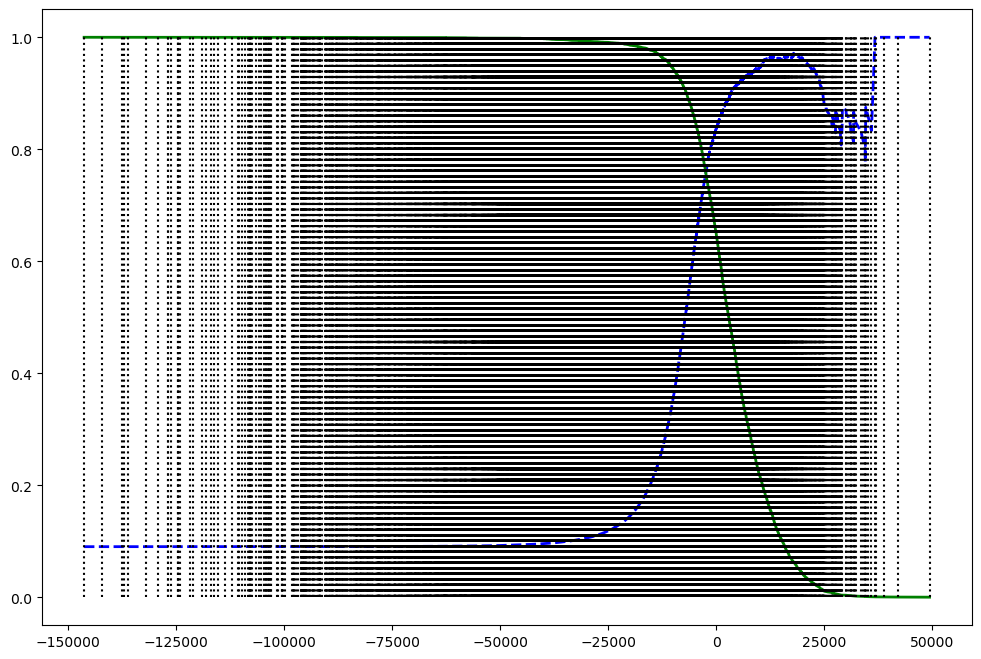

In [41]:
plt.figure(figsize=(12,8))
plt.plot(thersholds, precision[:-1], 'b--', label= "Precision", linewidth=2)
plt.plot(thersholds, recalls[:-1], 'g-', label= "Recall", linewidth=2)
plt.vlines(thersholds, 0, 1.0, 'k','dotted',label= "threshold")
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

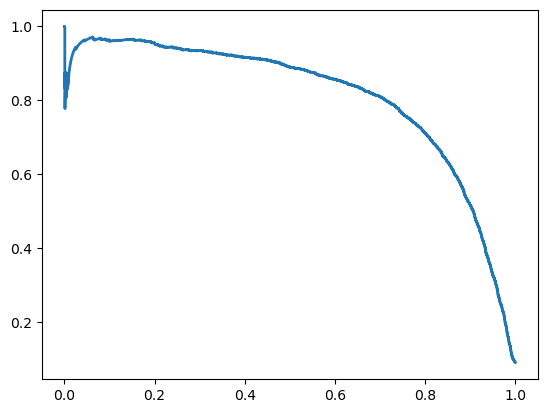

In [42]:
plt.plot(recalls, precision, linewidth=2, label='PRecision/REcall curve')
plt.show()